# **Lung cancer dataset**

NOTE: This dataset can be found on the public domain. The link, however, is inaccessible as of 30th November 2022. 

The dataset is quite small, with only around 60 observations. Following are the columns:
1. Name
2. Surname
3. Age
4. Smokes: Does the patient indulge in smoking or not?
5. AreaQ
6. Alkhol
7. Result

We use three algorithms to classify whether a patient has cancer or not:
1. Support Vector Machines
2. k-Nearest Neighbors
3. Naive Bayes
4. Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/content'

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Lung Cancer Dataset/lung_cancer.csv')
data

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


## Preprocessing

In [4]:
data.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [5]:
data.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [6]:
data.shape

(59, 7)

No missing values.

In [7]:
data['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

In [8]:
# Another way
from collections import Counter
Counter(data['Result'])

Counter({1: 28, 0: 31})

Support: 

0: 31

1: 28

Total: 59

In [9]:
data_copy = data.copy()

In [10]:
data_copy.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [11]:
data_copy.drop(['Name', 'Surname'], axis = 1, inplace=True)
data_copy.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [12]:
data_copy.shape

(59, 5)

### Split into inputs and targets

In [13]:
x = data_copy.iloc[:, :-1].values

In [14]:
y = data_copy.iloc[:, -1].values

## Split into test and train sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (47, 4)
Shape y_train:  (47,)
Shape x_test:  (12, 4)
Shape y_test:  (12,)


## Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(x_train, y_train)
log_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
y_pred_log = log_classifier.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [22]:
y_pred_train_log = log_classifier.predict(x_train)
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train_log))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_log))

Training Accuracy:  1.0
Testing Accuracy:  0.9166666666666666


In [23]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



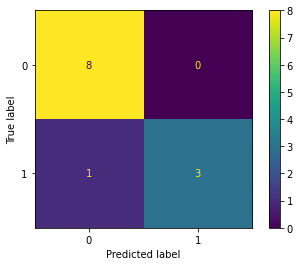

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels=['0', '1']).plot()

## SVM

In [25]:
from sklearn.svm import SVC
support_vector_classifier = SVC()
support_vector_classifier.fit(x_train, y_train)
support_vector_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [26]:
y_pred_SVM = support_vector_classifier.predict(x_test)

In [27]:
y_pred_train_SVM = support_vector_classifier.predict(x_train)
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train_SVM))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_SVM))

Training Accuracy:  1.0
Testing Accuracy:  0.9166666666666666


In [28]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



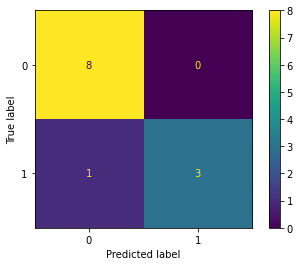

In [29]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_SVM), display_labels=['0', '1']).plot()

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier = GaussianNB()
bayes_classifier.fit(x_train, y_train)
bayes_classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [31]:
y_pred_NB = bayes_classifier.predict(x_test)

In [32]:
y_pred_proba_NB = bayes_classifier.predict_proba(x_test)
y_pred_proba_NB

array([[1.97789531e-01, 8.02210469e-01],
       [9.99998734e-01, 1.26632153e-06],
       [9.98950830e-01, 1.04916956e-03],
       [3.68134742e-10, 1.00000000e+00],
       [9.95125487e-01, 4.87451332e-03],
       [9.21513608e-01, 7.84863916e-02],
       [3.99116374e-11, 1.00000000e+00],
       [5.63206335e-01, 4.36793665e-01],
       [9.38247798e-01, 6.17522017e-02],
       [9.96350203e-01, 3.64979687e-03],
       [2.88045378e-08, 9.99999971e-01],
       [9.99973593e-01, 2.64065397e-05]])

In [33]:
y_pred_train_NB = bayes_classifier.predict(x_train)
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train_NB))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_NB))

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [34]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



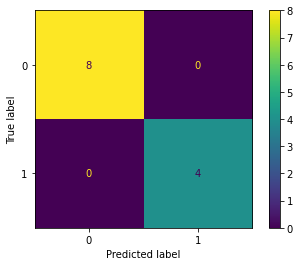

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_NB), display_labels=['0', '1']).plot()

## k-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [37]:
y_pred_kNN = kNN.predict(x_test)

In probabilitistic terms:

In [38]:
y_pred_proba_kNN = kNN.predict_proba(x_test)
y_pred_proba_kNN

array([[0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ]])

In [39]:
y_pred_train_kNN = kNN.predict(x_train)
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train_kNN))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_kNN))

Training Accuracy:  0.9787234042553191
Testing Accuracy:  0.9166666666666666


In [40]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



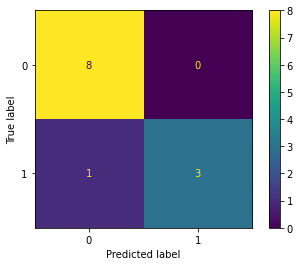

In [41]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_kNN), display_labels=['0', '1']).plot()

## ROC Curve

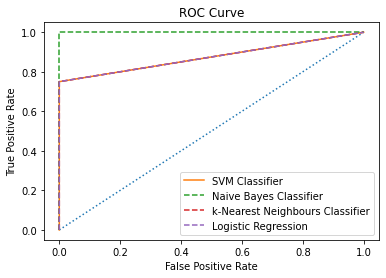

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr1, tpr1, '-', label = 'SVM Classifier')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr2, tpr2, '--', label = 'Naive Bayes Classifier')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr3, tpr3, '--', label = 'k-Nearest Neighbours Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_log)
plt.plot(fpr4, tpr4, '--', label = 'Logistic Regression')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Great, we have a nearly-perfect classifier in Naive Bayes. However, we must be cautious, since the Naive Bayes Classifier assumes that the predictors are independent and its estimation can be off in some instances.

Thus, to be fairly safe, we could choose either the Logistic Regression or the SVM Classifier.